In [1]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="//Users/Shashank/Downloads/hatespeech-2019-5d21dae1c824.json"

In [2]:
def implicit():
    from google.cloud import storage

    # If you don't specify credentials when constructing the client, the
    # client library will look for credentials in the environment.
    storage_client = storage.Client()

    # Make an authenticated API request
    buckets = list(storage_client.list_buckets())
    print(buckets)

In [3]:
%load_ext google.cloud.bigquery

In [4]:
%%bigquery tax_forms
SELECT * FROM `bigquery-public-data.irs_990.irs_990_2012`

Downloading: 100%|██████████| 294019/294019 [00:02<00:00, 104156.75rows/s]


In [77]:
from google.cloud import bigquery

bqclient = bigquery.Client()

# Download query results.
query_string = """
SELECT
CONCAT(
    'https://stackoverflow.com/questions/',
    CAST(id as STRING)) as url,
view_count
FROM `bigquery-public-data.stackoverflow.posts_questions`
WHERE tags like '%google-bigquery%'
ORDER BY view_count DESC
"""

dataframe = (
    bqclient.query(query_string)
    .result()
    .to_dataframe(
        # Optionally, explicitly request to use the BigQuery Storage API. As of
        # google-cloud-bigquery version 1.26.0 and above, the BigQuery Storage
        # API is used by default.
        create_bqstorage_client=True,
    )
)
print(dataframe.head())

                                            url  view_count
0  https://stackoverflow.com/questions/35159967      110426
1  https://stackoverflow.com/questions/22879669      104978
2  https://stackoverflow.com/questions/10604135      100158
3  https://stackoverflow.com/questions/27060396       84098
4  https://stackoverflow.com/questions/11057219       76822


In [84]:
import pandas as pd

In [85]:
from google.cloud import bigquery

bqclient = bigquery.Client()

# Download a table.
table = bigquery.TableReference.from_string(
    "hatespeech-2019.HS_trolls_analysis.y2_toxic_graph"
)
rows = bqclient.list_rows(
    table,
    selected_fields=[
        bigquery.SchemaField("comment_id", "STRING"),
        bigquery.SchemaField("author_channel_id", "STRING"),
        bigquery.SchemaField("author_name", "STRING"),
        bigquery.SchemaField("is_author_a_troll", "INTEGER"),
        bigquery.SchemaField("victim_channels", "INTEGER"),
        bigquery.SchemaField("toxic_comments_by_author", "INTEGER"),
        bigquery.SchemaField("video_id", "STRING"),
        bigquery.SchemaField("channel_id", "STRING"),
        bigquery.SchemaField("comment_date", "STRING"),
        bigquery.SchemaField("is_comment_at_night", "INTEGER"),
        bigquery.SchemaField("comment_hour_of_the_day", "INTEGER"),
        bigquery.SchemaField("is_female_channel", "INTEGER"),
        bigquery.SchemaField("is_minority_race", "INTEGER"),
        bigquery.SchemaField("is_toxicity", "INTEGER"),
        bigquery.SchemaField("is_severe_toxicity", "INTEGER"),
        bigquery.SchemaField("is_obscene", "INTEGER"),
        bigquery.SchemaField("is_threat", "INTEGER"),
        bigquery.SchemaField("is_insult", "INTEGER"),
        bigquery.SchemaField("is_identity_hate", "INTEGER"),
        bigquery.SchemaField("is_channel_teen", "INTEGER"),
        bigquery.SchemaField("v_duration_min", "STRING"),
        bigquery.SchemaField("view_count", "INTEGER"),
        bigquery.SchemaField("like_count", "INTEGER"),
        bigquery.SchemaField("dislike_count", "INTEGER"),
        bigquery.SchemaField("first_toxic_comment", "STRING"),
        bigquery.SchemaField("first_toxic_com_on", "STRING"),
        bigquery.SchemaField("video_posted", "TIMESTAMP"),
        bigquery.SchemaField("days_before_first_toxic", "INTEGER"),
        bigquery.SchemaField("days_since_first_toxic", "INTEGER"),
        
    ],
)
dataframe = rows.to_dataframe(
    # Optionally, explicitly request to use the BigQuery Storage API. As of
    # google-cloud-bigquery version 1.26.0 and above, the BigQuery Storage
    # API is used by default.
    create_bqstorage_client=True,
)
dataframe.head()

,comment_id,author_channel_id,author_name,is_author_a_troll,victim_channels,toxic_comments_by_author,video_id,channel_id,comment_date,is_comment_at_night,...,is_channel_teen,v_duration_min,view_count,like_count,dislike_count,first_toxic_comment,first_toxic_com_on,video_posted,days_before_first_toxic,days_since_first_toxic
0,z12mjxy55vmfyjkkl23pybnwpqyzhjwwh04,UCMSXv2-HuGL8t4OptjeDuZw,Super Aribah13,1,2,2,YzDRlRS23Gw,UCXfZmlaBEa36aC5k900VGjw,2016-03-07,0,...,0,3,1065775,46781,3505,z13zwlma2uvyjnesk22ozjuqfpnmt32u0,2016-03-06,2016-03-06 18:00:01+00:00,0,1
1,z13oebdo0rj4tnjdc23azjyjprutjrl5s04,UCRgjXxCHxUdRc1-IWCnotoQ,Shea Cooney,1,2,2,YzDRlRS23Gw,UCXfZmlaBEa36aC5k900VGjw,2016-12-26,1,...,0,3,1065775,46781,3505,z13zwlma2uvyjnesk22ozjuqfpnmt32u0,2016-03-06,2016-03-06 18:00:01+00:00,0,295
2,z121wttjurnjybghd04cihh4pqaauj5jbeo,UCC4wqvbJVJCri1ZJ1FZWYyg,Rory Howe,1,2,5,YzDRlRS23Gw,UCXfZmlaBEa36aC5k900VGjw,2017-01-04,1,...,0,3,1065775,46781,3505,z13zwlma2uvyjnesk22ozjuqfpnmt32u0,2016-03-06,2016-03-06 18:00:01+00:00,0,304
3,z133erdw0wzisnywe04cdzoobmeluzei2u40k,UCJWEBkseUXwg3LVjTyAPk7w,Kate Smith,1,3,3,3pDXBOwOuOk,UCWIGwT2BhhCpjWjRgchiY5g,2016-03-03,0,...,0,5,1609830,7293,2475,z12qg5hhdkfntp523220xt2wnzy3e3sw504,2015-05-11,2015-03-30 15:50:16+00:00,42,297
4,z12rvfs54zrkvndot04cibvidybtcppwbek,UCVVpJg2Kcg7MraROj3oX6oA,Dabbing MewTwo,1,2,3,SU-ZM3xoYag,UC2hAbftpVjHtFrDOpEM90aA,2015-09-18,1,...,0,38,8583932,33626,4077,z13vyblzksvgfj03423vhbnoqni0yfui204,2014-06-07,2014-06-06 11:30:48+00:00,1,468


In [86]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [87]:
# TODO
table = pd.pivot_table(dataframe, values='is_toxicity', index='is_comment_at_night', columns='is_female_channel', \
                       aggfunc= [lambda x: round(x.sum()/x.count()*100,1)],margins=True)
table

<lambda>            
is_female_channel          0     1   All
is_comment_at_night                     
0                       94.1  91.4  93.1
1                       94.0  91.5  93.2
All                     94.1  91.5  93.2

In [88]:
print("Hate Speech Details\n")
print(round(sum(dataframe['is_toxicity'])/dataframe.shape[0]*100,1), "% ", "Toxicity ",)
print(round(sum(dataframe['is_severe_toxicity'])/dataframe.shape[0]*100,1), "% ","Severe Toxicity",)
print(round(sum(dataframe['is_obscene'])/dataframe.shape[0]*100,1), "% ", "Obscenity")
print(round(sum(dataframe['is_threat'])/dataframe.shape[0]*100,1), "% ", " Threats",)
print(round(sum(dataframe['is_insult'])/dataframe.shape[0]*100,1), "% ", "Insults")
print(round(sum(dataframe['is_identity_hate'])/dataframe.shape[0]*100,1), "% "," Identity Hate")

Hate Speech Details

93.2 %  Toxicity 
35.2 %  Severe Toxicity
50.4 %  Obscenity
8.0 %   Threats
60.7 %  Insults
8.6 %   Identity Hate


In [42]:
df1= dataframe[dataframe.is_toxicity==1]
df1

,comment_id,author_channel_id,author_name,is_author_a_troll,victim_channels,toxic_comments_by_author,video_id,channel_id,comment_date,is_comment_at_night,...,is_channel_teen,v_duration_min,view_count,like_count,dislike_count,first_toxic_comment,first_toxic_com_on,video_posted,days_before_first_toxic,days_since_first_toxic
0,z12mjxy55vmfyjkkl23pybnwpqyzhjwwh04,UCMSXv2-HuGL8t4OptjeDuZw,Super Aribah13,1,2,2,YzDRlRS23Gw,UCXfZmlaBEa36aC5k900VGjw,2016-03-07,0,...,0,3,1065775,46781,3505,z13zwlma2uvyjnesk22ozjuqfpnmt32u0,2016-03-06,2016-03-06 18:00:01+00:00,0,1
1,z13oebdo0rj4tnjdc23azjyjprutjrl5s04,UCRgjXxCHxUdRc1-IWCnotoQ,Shea Cooney,1,2,2,YzDRlRS23Gw,UCXfZmlaBEa36aC5k900VGjw,2016-12-26,1,...,0,3,1065775,46781,3505,z13zwlma2uvyjnesk22ozjuqfpnmt32u0,2016-03-06,2016-03-06 18:00:01+00:00,0,295
2,z121wttjurnjybghd04cihh4pqaauj5jbeo,UCC4wqvbJVJCri1ZJ1FZWYyg,Rory Howe,1,2,5,YzDRlRS23Gw,UCXfZmlaBEa36aC5k900VGjw,2017-01-04,1,...,0,3,1065775,46781,3505,z13zwlma2uvyjnesk22ozjuqfpnmt32u0,2016-03-06,2016-03-06 18:00:01+00:00,0,304
3,z133erdw0wzisnywe04cdzoobmeluzei2u40k,UCJWEBkseUXwg3LVjTyAPk7w,Kate Smith,1,3,3,3pDXBOwOuOk,UCWIGwT2BhhCpjWjRgchiY5g,2016-03-03,0,...,0,5,1609830,7293,2475,z12qg5hhdkfntp523220xt2wnzy3e3sw504,2015-05-11,2015-03-30 15:50:16+00:00,42,297
4,z12rvfs54zrkvndot04cibvidybtcppwbek,UCVVpJg2Kcg7MraROj3oX6oA,Dabbing MewTwo,1,2,3,SU-ZM3xoYag,UC2hAbftpVjHtFrDOpEM90aA,2015-09-18,1,...,0,38,8583932,33626,4077,z13vyblzksvgfj03423vhbnoqni0yfui204,2014-06-07,2014-06-06 11:30:48+00:00,1,468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653320,z131wvig3rqafxj0u22kgbejworkdl0jc04,UCImPyOlKqX8WPUUlcOXMp-g,Bxtchy MSP,1,2,5,YjcprDY1WLs,UCwD4x63A9KC7Si2RuSfg-SA,2017-07-03,0,...,0,8,3495873,227576,4899,z132dzqy3k2qgxue022uw33xuozvdtmq504,2017-06-18,2017-06-18 15:50:52+00:00,0,15
1653321,z13jcjgrszveh1oa304cc50qsu3od1jawh0,UCd0aBqQ8D9-O8U55W2z485Q,AldoPutraGt122 Aaaa,1,2,2,n1JBqWBQCCQ,UCwD4x63A9KC7Si2RuSfg-SA,2017-03-01,1,...,0,11,5653408,307521,5085,z12cvvkaonnbx1l1f22ye3wjhp2dzvd1g,2017-01-15,2017-01-15 18:30:04+00:00,0,45
1653322,z131izcrinbugvz5d04civgqqrfqtzip3ho,UCJveETRNdYq0dkBnuc91jKA,Steven Martens,1,2,2,VdS-PZIDSlM,UCwD4x63A9KC7Si2RuSfg-SA,2017-07-10,0,...,0,5,5694166,346024,3423,z134hfgwkvmbxz2fr22msfg5an2hcj4wc04,2017-05-07,2017-05-07 16:55:05+00:00,0,64
1653323,z13zxpp4okzhdtfnv22ehnfzwpbmzroir04,UCwgFOnMkIMtA50qp9roAesQ,sofia pro,1,2,4,VdS-PZIDSlM,UCwD4x63A9KC7Si2RuSfg-SA,2017-05-08,0,...,0,5,5694166,346024,3423,z134hfgwkvmbxz2fr22msfg5an2hcj4wc04,2017-05-07,2017-05-07 16:55:05+00:00,0,1


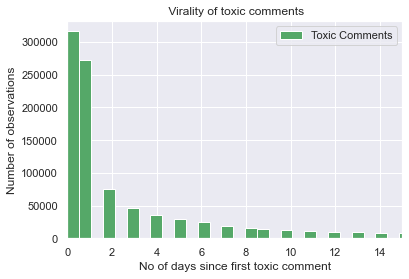

In [89]:
df1= dataframe[dataframe.is_toxicity==1]
df1.hist('days_since_first_toxic', bins = 5000, color= "g")
plt.legend(['Toxic Comments'])
plt.xlabel("No of days since first toxic comment")
plt.ylabel("Number of observations")
plt.title(" Virality of toxic comments")
plt.xlim(0,15)
plt.show()

In [109]:
# Download query results.
query_string = """
select 
round(avg(Days_before_first_toxic_comment))
from
`hatespeech-2019.HS_trolls_analysis.HS_video_details`
"""

df2 = (
    bqclient.query(query_string)
    .result()
    .to_dataframe(
        # Optionally, explicitly request to use the BigQuery Storage API. As of
        # google-cloud-bigquery version 1.26.0 and above, the BigQuery Storage
        # API is used by default.
        create_bqstorage_client=True,
    )
)
print("Average No of days before first toxic comment= ",df2['f0_'].iloc[0], " days")

Average No of days before first toxic comment=  41.0  days


In [90]:
df3= dataframe[dataframe.is_severe_toxicity==1]

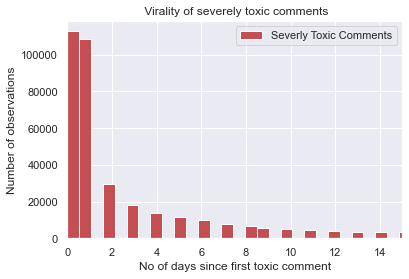

In [91]:
df3.hist('days_since_first_toxic', bins = 5000, color= "r")
plt.legend(['Severly Toxic Comments'])
plt.xlabel("No of days since first toxic comment")
plt.ylabel("Number of observations")
plt.title(" Virality of severely toxic comments")
plt.xlim(0,15)
plt.show()

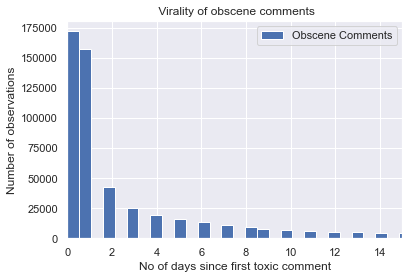

In [92]:
df4= dataframe[dataframe.is_obscene==1]
df4.hist('days_since_first_toxic', bins = 5000, color= "b")
plt.legend(['Obscene Comments'])
plt.xlabel("No of days since first toxic comment")
plt.ylabel("Number of observations")
plt.title(" Virality of obscene comments")
plt.xlim(0,15)
plt.show()

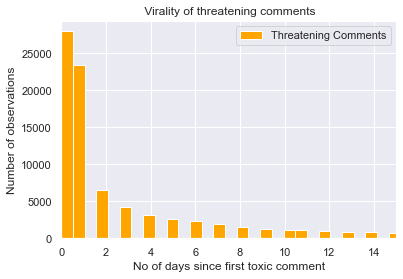

In [95]:
df5= dataframe[dataframe.is_threat==1]
df5.hist('days_since_first_toxic', bins = 5000, color= "orange")
plt.legend(['Threatening Comments'])
plt.xlabel("No of days since first toxic comment")
plt.ylabel("Number of observations")
plt.title(" Virality of threatening comments")
plt.xlim(0,15)
plt.show()

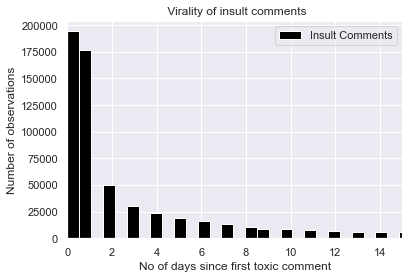

In [97]:
df6= dataframe[dataframe.is_insult==1]
df6.hist('days_since_first_toxic', bins = 5000, color= "black")
plt.legend(['Insult Comments'])
plt.xlabel("No of days since first toxic comment")
plt.ylabel("Number of observations")
plt.title(" Virality of insult comments")
plt.xlim(0,15)
plt.show()

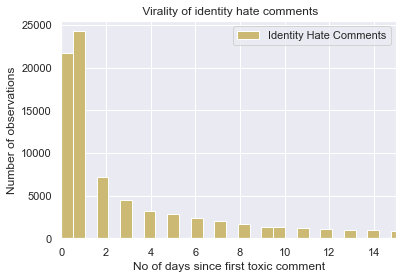

In [99]:
df7= dataframe[dataframe.is_identity_hate==1]
df7.hist('days_since_first_toxic', bins = 5000, color= "y")
plt.legend(['Identity Hate Comments'])
plt.xlabel("No of days since first toxic comment")
plt.ylabel("Number of observations")
plt.title(" Virality of identity hate comments")
plt.xlim(0,15)
plt.show()